# Avocado Project

Project Description

D
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
Some relevant columns in the dataset:
    
•Date - The date of the observation

•AveragePrice - the average price of a single avocado

•type - conventional or organic

•year - the year

•Region - the city or region of the observation

•Total Volume - Total number of avocados sold

•4046 - Total number of avocados with PLU 4046 sold

•4225 - Total number of avocados with PLU 4225 sold

•4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 
The dataset can be seen in two angles to find the region and find the average price .
Task: One of Classification and other of Regression
Do both tasks in the same .ipynb file and submit at single file. 


Dataset Link-
•https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip

https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv

In [4]:
!pip install -q datascience 
!pip install -q pandas-profiling 

In [5]:
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import scipy as sp                                                  # Importing library for scientific calculations
# from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
from scipy.stats import randint as sp_randint                       # for initializing random integer values
#-------------------------------------------------------------------------------------------------------------------------------
from matplotlib.pylab import rcParams                               # Backend used for rendering and GUI integration                                               
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier                 # To create the RandomForest Model
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
from sklearn.model_selection import RandomizedSearchCV              # to create a RandomSearched hyper-tuned model

from sklearn.feature_selection import RFE
import statsmodels.api as sm

#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\BHAVITH\OneDrive\Desktop\Shwetha Data trained\DS live class Note_from Dec 3rd\New folder\avocado.csv")

In [3]:
df

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

In [8]:
avocado_df = pd.read_csv(r"C:\Users\BHAVITH\OneDrive\Desktop\Shwetha Data trained\DS live class Note_from Dec 3rd\New folder\avocado.csv",index_col=0)
avocado_df.head(2)

Date  AveragePrice  Total Volume       4046        4225     4770  \
0  2015-12-27       1.33000   64236.62000 1036.74000 54454.85000 48.16000   
1  2015-12-20       1.35000   54876.98000  674.28000 44638.81000 58.33000   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0  8696.87000  8603.62000    93.25000      0.00000  conventional  2015  Albany  
1  9505.56000  9408.07000    97.49000      0.00000  conventional  2015  Albany

The dataset contains weekly retail scan data for National Retail Volume (units) and price.

Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

The column AveragePrice is the average price of a single avocado.

This is the data that we have to predict for future samples.

In [9]:
avocado_df.tail()

Date  AveragePrice  Total Volume       4046       4225      4770  \
7   2018-02-04       1.63000   17074.83000 2046.96000 1529.20000   0.00000   
8   2018-01-28       1.71000   13888.04000 1191.70000 3431.50000   0.00000   
9   2018-01-21       1.87000   13766.76000 1191.92000 2452.79000 727.94000   
10  2018-01-14       1.93000   16205.22000 1527.63000 2981.04000 727.01000   
11  2018-01-07       1.62000   17489.58000 2894.77000 2356.13000 224.53000   

    Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
7  13498.67000 13066.82000   431.85000      0.00000  organic  2018   
8   9264.84000  8940.04000   324.80000      0.00000  organic  2018   
9   9394.11000  9351.80000    42.31000      0.00000  organic  2018   
10 10969.54000 10919.54000    50.00000      0.00000  organic  2018   
11 12014.15000 11988.14000    26.01000      0.00000  organic  2018   

              region  
7   WestTexNewMexico  
8   WestTexNewMexico  
9   WestTexNewMexico  
10  WestTexNewMexico  
11  WestTexNewMexico

In [10]:
avocado_df.shape

(18249, 13)

In [11]:
df.shape

(18249, 14)

# Data Pre-Processing

This section is emphasised on performing data manipulation over unstructured data for further processing and analysis.

To modify unstructured data to strucuted data you need to verify and manipulate the integrity of the data by:

Handling missing data,

Handling redundant data,

Handling inconsistent data,

Handling outliers,

Handling typos

In [12]:
avocado_df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [13]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [14]:
avocado_df.columns.tolist()

['Date',
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'type',
 'year',
 'region']

In [15]:
avocado_df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [17]:
avocado_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


Well as a first observation we can see that we are lucky, we dont have any missing values (18249 complete data) and 13 columns. Now let's do some Feature Engineering on the Date Feature in pre-processing later so we can be able to use the day and the month columns in building our machine learning model later. ( I didn't mention the year because its already there in data frame)

In [29]:
# check the no.of missing values in each column 
avocado_df.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [22]:
avocado_df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

We can see that no missing values exist in dataset, that's great!

Observations:
    
As per Pre-Profiling Report, we observe no Duplicate Rows, No Missing Values, No Null values

Data Seems normally distributed for Average Price

Data Seems highly skewed (Right / Positive Skewed)

<AxesSubplot:>

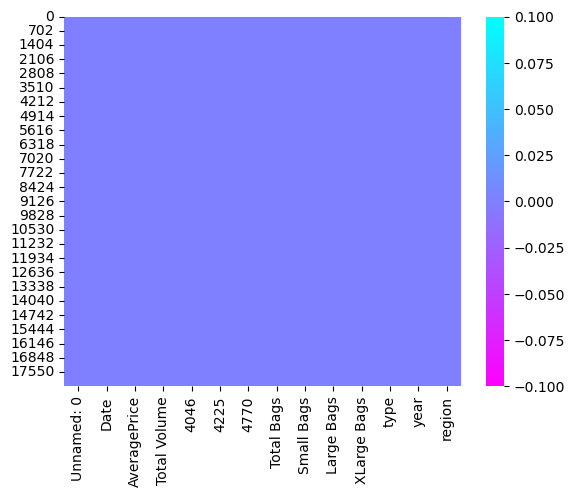

In [24]:
avocado_df.isnull().sum()
sns.heatmap(df.isnull(),cmap ="cool_r")

# Description of Dataset:

In [18]:
avocado_df.describe()

AveragePrice   Total Volume           4046           4225  \
count   18249.00000    18249.00000    18249.00000    18249.00000   
mean        1.40598   850644.01301   293008.42453   295154.56836   
std         0.40268  3453545.35540  1264989.08176  1204120.40114   
min         0.44000       84.56000        0.00000        0.00000   
25%         1.10000    10838.58000      854.07000     3008.78000   
50%         1.37000   107376.76000     8645.30000    29061.02000   
75%         1.66000   432962.29000   111020.20000   150206.86000   
max         3.25000 62505646.52000 22743616.17000 20470572.61000   

               4770     Total Bags     Small Bags    Large Bags  XLarge Bags  \
count   18249.00000    18249.00000    18249.00000   18249.00000  18249.00000   
mean    22839.73599   239639.20206   182194.68670   54338.08814   3106.42651   
std    107464.06844   986242.39922   746178.51496  243965.96455  17692.89465   
min         0.00000        0.00000        0.00000       0.00000      0.00000   
25%         0.00000     5088.64000     2849.42000     127.47000      0.00000   
50%       184.99000    39743.83000    26362.82000    2647.71000      0.00000   
75%      6243.42000   110783.37000    83337.67000   22029.25000    132.50000   
max   2546439.11000 19373134.37000 13384586.80000 5719096.61000 551693.65000   

             year  
count 18249.00000  
mean   2016.14790  
std       0.93994  
min    2015.00000  
25%    2015.00000  
50%    2016.00000  
75%    2017.00000  
max    2018.00000

Observation:
Average Prices seems normally distributed as mean and median are closure to each other.
Data at Total Volume, Avocado Types (4046, 4225, 4770), Total Bags (Small, Large, XLarge) seems highly skewed Right side (positive skewed)

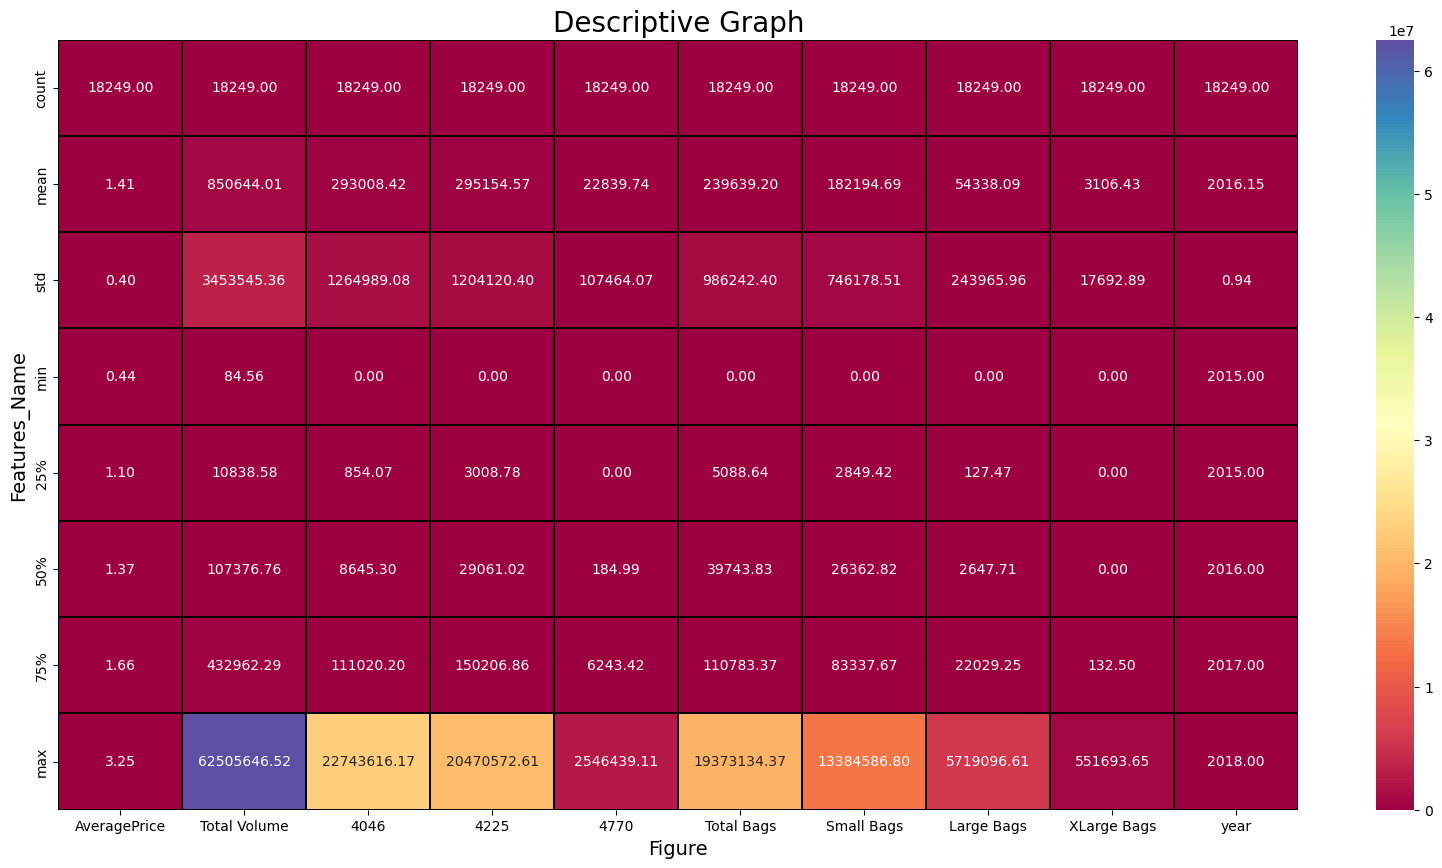

In [26]:
plt.figure(figsize =(20,10))
sns.heatmap(avocado_df.describe(), annot =True, fmt ='0.2f',linewidth = 0.2, linecolor ='black',cmap = 'Spectral')
plt.xlabel ('Figure', fontsize =14)
plt.ylabel('Features_Name',fontsize =14)
plt.title('Descriptive Graph',fontsize =20)
plt.show()

In [19]:
#Use include='all' option to generate descriptive statistics for all columns
#You can get idea about which column has missing values using this


We can see all columns having count 18249. Looks like it doesn't contain missing values

# 5. Data Pre-Processing

In [20]:
avocado_df.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [25]:
avocado_df.nunique().to_frame("No. of unique values")

No. of unique values
Date                           169
AveragePrice                   259
Total Volume                 18237
4046                         17702
4225                         18103
4770                         12071
Total Bags                   18097
Small Bags                   17321
Large Bags                   15082
XLarge Bags                   5588
type                             2
year                             4
region                          54

In [30]:
#Checking the values counts of each column

for i in avocado_df.columns:
    print(avocado_df[i].value_counts())
    print("\n")

2015-12-27    108
2017-12-24    108
2017-12-10    108
2017-12-03    108
2017-11-26    108
2017-11-19    108
2017-11-12    108
2017-11-05    108
2017-10-29    108
2017-10-22    108
2017-10-15    108
2017-10-08    108
2017-10-01    108
2017-09-24    108
2017-09-17    108
2017-09-10    108
2017-09-03    108
2017-08-27    108
2017-08-20    108
2017-12-17    108
2017-12-31    108
2017-08-06    108
2016-01-03    108
2016-05-01    108
2016-04-24    108
2016-04-17    108
2016-04-10    108
2016-04-03    108
2016-03-27    108
2016-03-20    108
2016-03-13    108
2016-03-06    108
2016-02-28    108
2016-02-21    108
2016-02-14    108
2016-02-07    108
2016-01-31    108
2016-01-24    108
2016-01-17    108
2016-01-10    108
2017-08-13    108
2017-07-30    108
2015-12-20    108
2017-02-19    108
2017-02-05    108
2017-01-29    108
2017-01-22    108
2017-01-15    108
2017-01-08    108
2017-01-01    108
2018-03-25    108
2018-03-18    108
2018-03-11    108
2018-03-04    108
2018-02-25    108
2018-02-18

0.00000           15
990.00000          5
300.00000          5
550.00000          4
266.67000          4
916.67000          4
286.67000          3
263.33000          3
196.67000          3
260.00000          3
106.67000          3
436.67000          3
880.00000          3
453.33000          3
153.33000          3
846.67000          3
803.33000          3
856.67000          3
613.33000          3
2110.00000         3
381.18000          2
473.33000          2
890.00000          2
403.33000          2
1823.41000         2
753.33000          2
876.67000          2
3205.37000         2
6321.48000         2
610.00000          2
732.35000          2
413.98000          2
156.67000          2
270.00000          2
796.67000          2
2906.67000         2
2533.33000         2
1100.00000         2
1473.33000         2
813.33000          2
923.33000          2
919.14000          2
566.20000          2
850.00000          2
33.33000           2
986.67000          2
2649.52000         2
820.00000    

# Type of Avocado vs Average Price

In [42]:
print(avocado_df["type"].unique())

['conventional' 'organic']


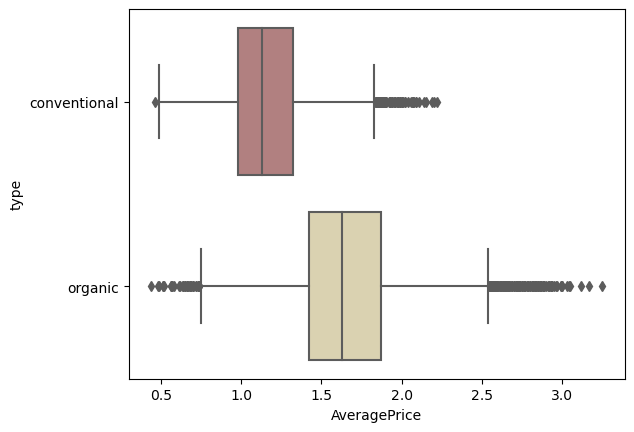

In [44]:
sns.boxplot(y="type", x="AveragePrice", data=avocado_df, palette='pink')
plt.show()

From the above boxplot we can say that Organic fruit price is more as compared to conventional fruit

# Profiling

In [33]:
import pandas_profiling
%matplotlib inline

In [ ]:
profile = pandas_profiling.ProfileReport(avocado_df)
profile.to_file(outputfile="avocado_before_preprocessing.html")

In [36]:
d = avocado_df.copy()
d.head(2)

Date  AveragePrice  Total Volume       4046        4225     4770  \
0  2015-12-27       1.33000   64236.62000 1036.74000 54454.85000 48.16000   
1  2015-12-20       1.35000   54876.98000  674.28000 44638.81000 58.33000   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0  8696.87000  8603.62000    93.25000      0.00000  conventional  2015  Albany  
1  9505.56000  9408.07000    97.49000      0.00000  conventional  2015  Albany

In [37]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


 Preprocessing
    
The Feature "Unnamed:0" is just a representation of the indexes, so it's useless to keep it, lets remove it now !

In [ ]:
sns.pairplot(avocado_df)                          #Checking co-relationship

In [ ]:
sns.distplot(d['AveragePrice'],color='b',hist=True)

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>],
       [<AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>],
       [<AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

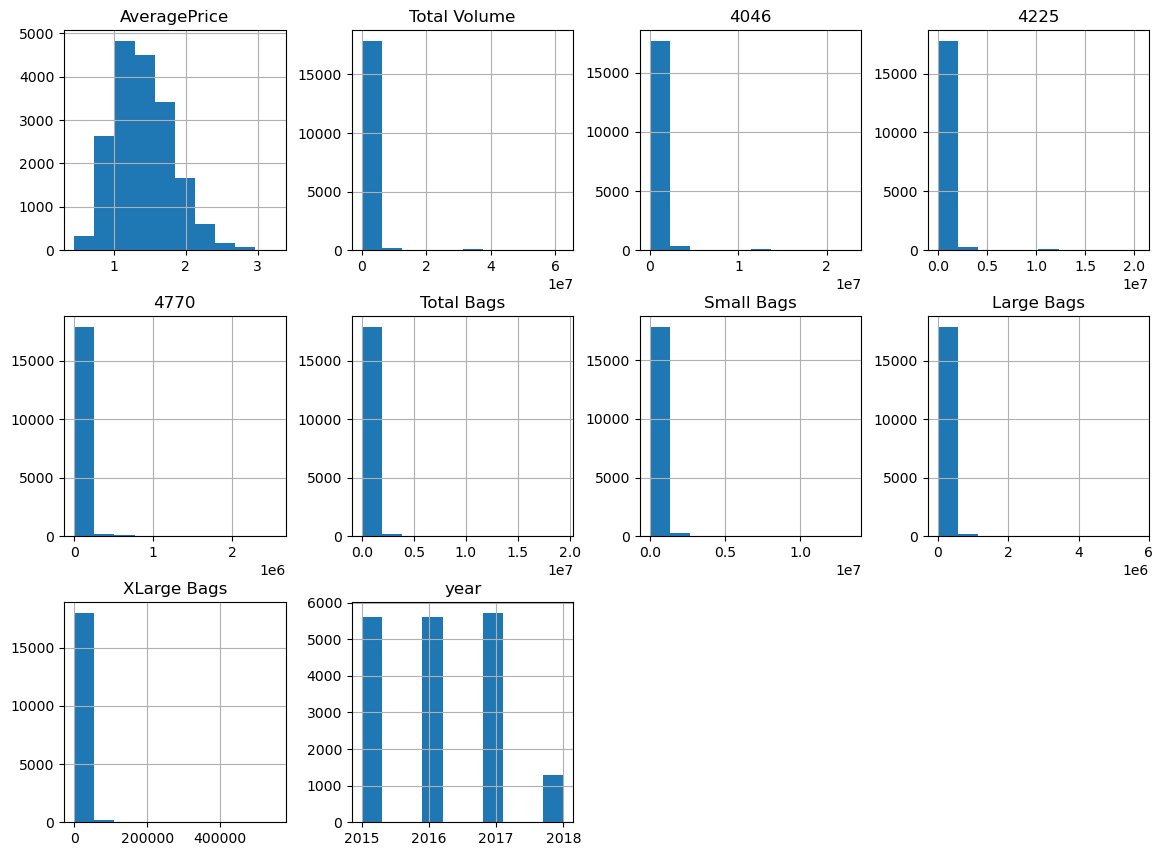

In [47]:
avocado_df.hist(figsize=(14,14),grid=True,layout=(4,4))

In [48]:
d.skew()

AveragePrice    0.58030
Total Volume    9.00769
4046            8.64822
4225            8.94247
4770           10.15940
Total Bags      9.75607
Small Bags      9.54066
Large Bags      9.79645
XLarge Bags    13.13975
year            0.21534
dtype: float64

# Using Log1p Method:

.Numpy log() function is used to get the natural logarithm of value x+1, where x is an element of an array or x is an object.

.The best skew value for normally distributes is very close to zero, so we are using “log1p” method to make the skew value near to zero

In [49]:
skew=('Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags')
for col in skew :
    if d.skew().loc[col]>0.55:
        d[col]=np.log1p(d[col])

In [50]:
d.skew()                        #Checking skew value after apply log1p method

AveragePrice    0.58030
Total Volume    0.08810
4046           -0.32819
4225           -0.48665
4770            0.09999
Total Bags     -0.21887
Small Bags     -0.62215
Large Bags     -0.54777
XLarge Bags     1.17649
year            0.21534
dtype: float64

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>],
       [<AxesSubplot:title={'center':'4225'}>,
        <AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>],
       [<AxesSubplot:title={'center':'Large Bags'}>,
        <AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

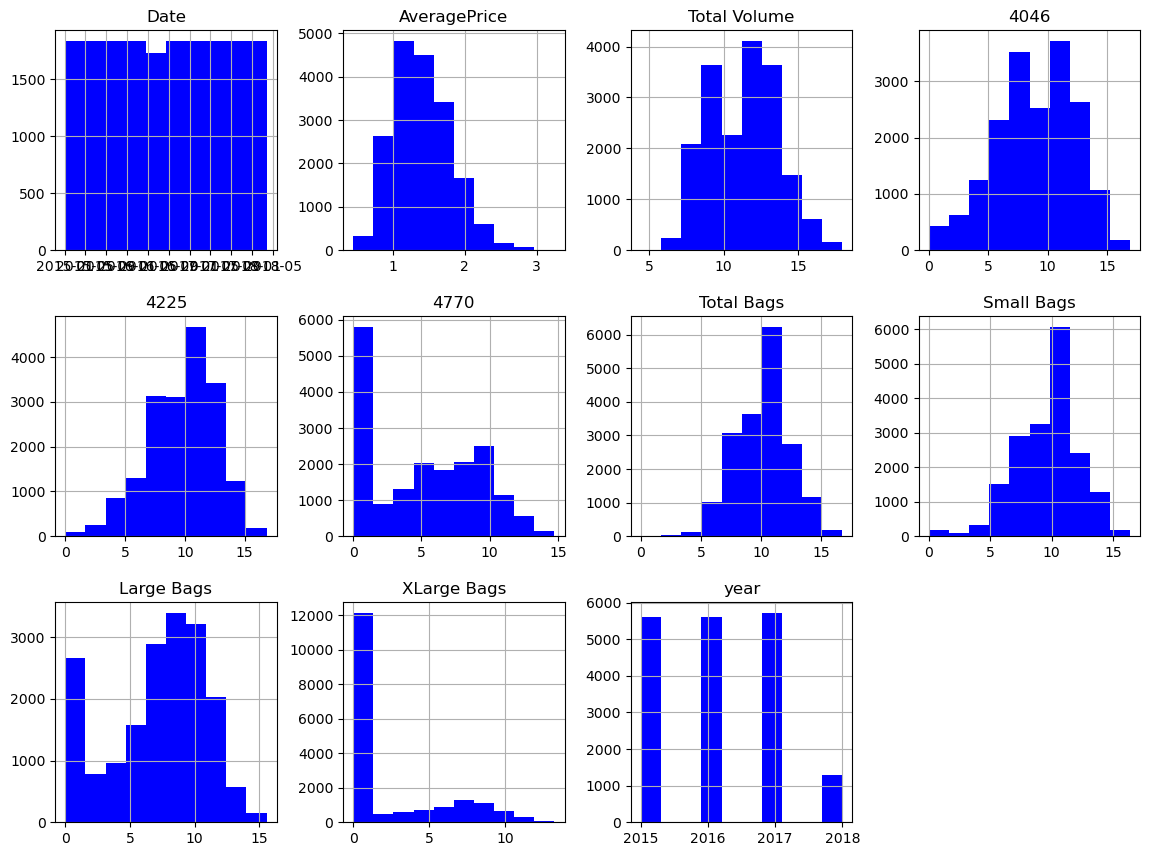

In [51]:
d.hist(figsize=(14,14),grid=True,layout=(4,4),color='b')

AveragePrice       AxesSubplot(0.125,0.712609;0.168478x0.167391)
Total Volume    AxesSubplot(0.327174,0.712609;0.168478x0.167391)
4046            AxesSubplot(0.529348,0.712609;0.168478x0.167391)
4225            AxesSubplot(0.731522,0.712609;0.168478x0.167391)
4770               AxesSubplot(0.125,0.511739;0.168478x0.167391)
Total Bags      AxesSubplot(0.327174,0.511739;0.168478x0.167391)
Small Bags      AxesSubplot(0.529348,0.511739;0.168478x0.167391)
Large Bags      AxesSubplot(0.731522,0.511739;0.168478x0.167391)
XLarge Bags         AxesSubplot(0.125,0.31087;0.168478x0.167391)
year             AxesSubplot(0.327174,0.31087;0.168478x0.167391)
dtype: object

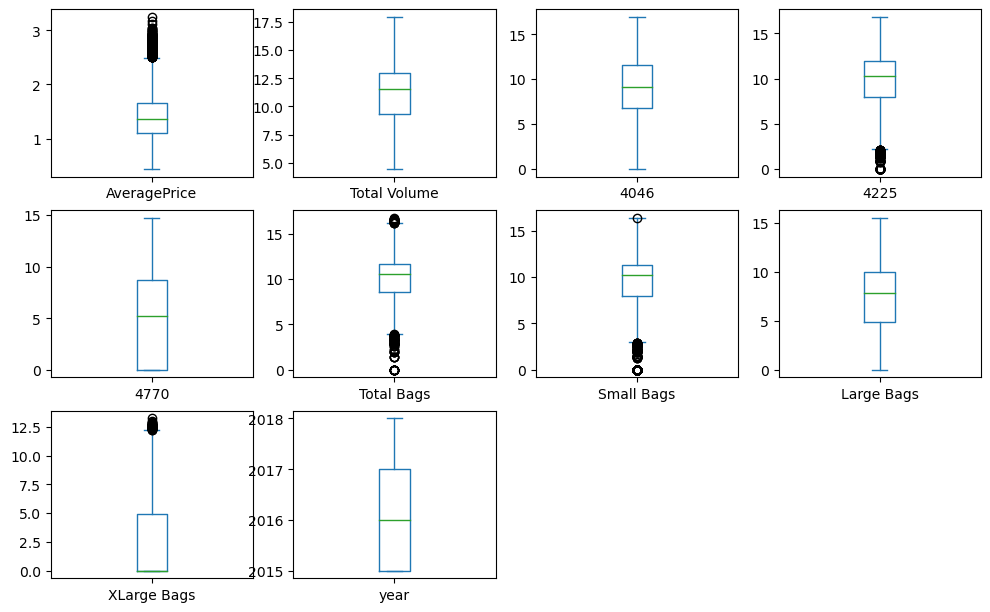

In [52]:
d.plot(kind='box',subplots=True,layout=(4,4),figsize=(12,10))

In [53]:
df=d.copy()
df.drop(['Date'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 1.8+ MB


# Removing Outliers using Z-Score method

In [57]:
from scipy.stats import zscore
z =np.abs(zscore(d['AveragePrice']))
print(z)
print(np.where(z<3))
dn=d[(z<3)]
print('Shape of New Dataframe dn:',dn.shape)

0    0.18869
1    0.13902
2    1.18207
3    0.80955
4    0.31286
5    0.36253
6    1.03306
7    1.05790
8    0.95856
9    0.83439
10   0.71021
11   0.31286
12   0.23836
13   1.03306
14   0.18869
15   0.31286
16   0.73505
17   0.83439
18   0.16385
19   0.18869
20   0.71021
21   0.10933
22   0.73505
23   0.36253
24   0.88405
25   0.13902
26   0.08935
27   0.33770
28   0.21352
29   0.83439
30   0.43703
31   0.53637
32   0.05966
33   0.36253
34   0.51154
35   0.46187
36   0.53637
37   0.68538
38   0.61088
39   0.95856
40   0.71021
41   0.73505
42   0.83439
43   1.03306
44   0.83439
45   0.85922
46   1.03306
47   1.03306
48   0.85922
49   0.58604
50   0.41220
51   0.46187
0    1.03306
1    0.80955
2    1.10757
3    0.83439
4    1.03306
5    1.00823
6    0.68538
7    0.71021
8    1.03306
9    0.78472
10   0.78472
11   1.13240
12   1.10757
13   0.83439
14   1.18207
15   0.83439
16   1.08273
17   0.63571
18   0.71021
19   0.78472
20   0.98339
21   0.63571
22   0.80955
23   1.08273
24   0.66054

In [58]:
z =np.abs(zscore(dn['4225']))
print(z)
print(np.where(z<3))
dn1=dn[(z<3)]
print('Shape of New Dataframe dn1:',dn1.shape)

0    0.37007
1    0.30046
2    0.61360
3    0.46777
4    0.29412
5    0.32638
6    0.47593
7    0.58924
8    0.53544
9    0.43076
10   0.48496
11   0.35845
12   0.33934
13   0.58087
14   0.40000
15   0.43580
16   0.54628
17   0.56262
18   0.44753
19   0.45128
20   0.58629
21   0.41572
22   0.55355
23   0.51365
24   0.56385
25   0.47080
26   0.38941
27   0.48998
28   0.37610
29   0.58020
30   0.46037
31   0.46484
32   0.51325
33   0.58988
34   0.30707
35   0.22359
36   0.20451
37   0.16562
38   0.22100
39   0.39590
40   0.20833
41   0.16646
42   0.16558
43   0.30817
44   0.21582
45   0.16181
46   0.25416
47   0.40414
48   0.19673
49   0.17881
50   0.17992
51   0.14069
0    0.12890
1    0.03136
2    0.17297
3    0.07932
4    0.14807
5    0.15814
6    0.14260
7    0.21005
8    0.42101
9    0.42995
10   0.40247
11   0.55009
12   0.55670
13   0.41479
14   0.51668
15   0.41825
16   0.47595
17   0.30203
18   0.31268
19   0.27905
20   0.31881
21   0.27834
22   0.29610
23   0.32470
24   0.24363

In [59]:
z =np.abs(zscore(dn1['Total Bags']))
print(z)
print(np.where(z<3))
dn2=dn1[(z<3)]
print('Shape of New Dataframe dn2:',dn2.shape)

0    0.51101
1    0.47147
2    0.54014
3    0.69027
4    0.66263
5    0.62806
6    0.53076
7    0.61850
8    0.39112
9    0.51465
10   0.53686
11   0.44345
12   0.50796
13   0.67351
14   0.48276
15   0.48183
16   0.54869
17   0.43549
18   0.41141
19   0.42964
20   0.48475
21   0.37356
22   0.32572
23   0.39507
24   0.05171
25   0.03809
26   0.01286
27   0.10085
28   0.02455
29   0.08293
30   0.06559
31   0.02992
32   0.01294
33   0.21768
34   0.34720
35   0.33991
36   0.28982
37   0.21026
38   0.41764
39   0.56606
40   0.46020
41   0.43274
42   0.48687
43   0.48835
44   0.47741
45   0.43522
46   0.42211
47   0.48009
48   0.41282
49   0.37079
50   0.52514
51   0.46171
0    0.39258
1    0.33881
2    0.35912
3    0.27283
4    0.29927
5    0.32016
6    0.23966
7    0.25437
8    0.38613
9    0.32306
10   0.35032
11   0.50942
12   0.34380
13   0.22639
14   0.50894
15   0.45283
16   0.54951
17   0.35721
18   0.32826
19   0.34197
20   0.40001
21   0.30004
22   0.32665
23   0.35729
24   0.33506

In [60]:
z =np.abs(zscore(dn2['Small Bags']))
print(z)
print(np.where(z<3))
dn3=dn2[(z<3)]
print('Shape of New Dataframe dn3:',dn3.shape)


0    0.27229
1    0.23705
2    0.29889
3    0.43616
4    0.41528
5    0.37941
6    0.29138
7    0.39722
8    0.17169
9    0.29795
10   0.30703
11   0.21830
12   0.28267
13   0.42175
14   0.27757
15   0.26948
16   0.31283
17   0.20446
18   0.18464
19   0.20143
20   0.24947
21   0.14879
22   0.10770
23   0.17173
24   0.13690
25   0.21569
26   0.16842
27   0.09175
28   0.19774
29   0.10346
30   0.11918
31   0.20352
32   0.16803
33   0.01472
34   0.13454
35   0.13860
36   0.09168
37   0.01704
38   0.21819
39   0.34204
40   0.24362
41   0.21341
42   0.26216
43   0.25514
44   0.25453
45   0.21379
46   0.20856
47   0.24712
48   0.20894
49   0.15275
50   0.29919
51   0.24643
0    0.41039
1    0.39656
2    0.32261
3    0.30317
4    0.25810
5    0.30274
6    0.26548
7    0.28832
8    0.32821
9    0.24345
10   0.30159
11   0.34484
12   0.05642
13   0.07067
14   0.26598
15   0.39115
16   0.42023
17   0.39830
18   0.38466
19   0.38060
20   0.38713
21   0.35399
22   0.38100
23   0.38088
24   0.38887

In [61]:
z =np.abs(zscore(dn3['XLarge Bags']))
print(z)
print(np.where(z<3))
dn4=dn3[(z<3)]
print('Shape of New Dataframe dn4:',dn4.shape)

0    0.65557
1    0.65557
2    0.65557
3    0.65557
4    0.65557
5    0.65557
6    0.65557
7    0.65557
8    0.65557
9    0.65557
10   0.65557
11   0.65557
12   0.65557
13   0.65557
14   0.65557
15   0.65557
16   0.65557
17   0.65557
18   0.65557
19   0.65557
20   0.65557
21   0.65557
22   0.65557
23   0.65557
24   0.34686
25   0.65557
26   0.65557
27   0.65557
28   0.65557
29   0.65557
30   0.65557
31   0.65557
32   0.65557
33   0.65557
34   0.65557
35   0.65557
36   0.65557
37   0.65557
38   0.66425
39   0.65557
40   0.65557
41   0.65557
42   0.65557
43   0.65557
44   0.65557
45   0.65557
46   0.65557
47   0.65557
48   0.65557
49   0.65557
50   0.65557
51   0.65557
0    0.65557
1    0.65557
2    0.10311
3    0.28391
4    0.26156
5    0.65557
6    0.65557
7    0.26368
8    0.02583
9    0.65557
10   0.65557
11   0.65557
12   0.65557
13   0.27861
14   0.51572
15   0.11100
16   0.47512
17   0.32400
18   0.65557
19   0.65557
20   0.60144
21   0.40772
22   0.65557
23   0.65557
24   0.65557

In [62]:
dn4.head(2)

Date  AveragePrice  Total Volume    4046     4225    4770  Total Bags  \
0 2015-12-27       1.33000      11.07034 6.94480 10.90515 3.89508     9.07083   
1 2015-12-20       1.35000      10.91287 6.51513 10.70638 4.08312     9.15974   

   Small Bags  Large Bags  XLarge Bags          type  year  region  
0     9.06005     4.54595      0.00000  conventional  2015  Albany  
1     9.14943     4.58996      0.00000  conventional  2015  Albany

# Status after removing Outliers

AveragePrice       AxesSubplot(0.125,0.747241;0.227941x0.132759)
Total Volume    AxesSubplot(0.398529,0.747241;0.227941x0.132759)
4046            AxesSubplot(0.672059,0.747241;0.227941x0.132759)
4225               AxesSubplot(0.125,0.587931;0.227941x0.132759)
4770            AxesSubplot(0.398529,0.587931;0.227941x0.132759)
Total Bags      AxesSubplot(0.672059,0.587931;0.227941x0.132759)
Small Bags         AxesSubplot(0.125,0.428621;0.227941x0.132759)
Large Bags      AxesSubplot(0.398529,0.428621;0.227941x0.132759)
XLarge Bags     AxesSubplot(0.672059,0.428621;0.227941x0.132759)
year                AxesSubplot(0.125,0.26931;0.227941x0.132759)
dtype: object

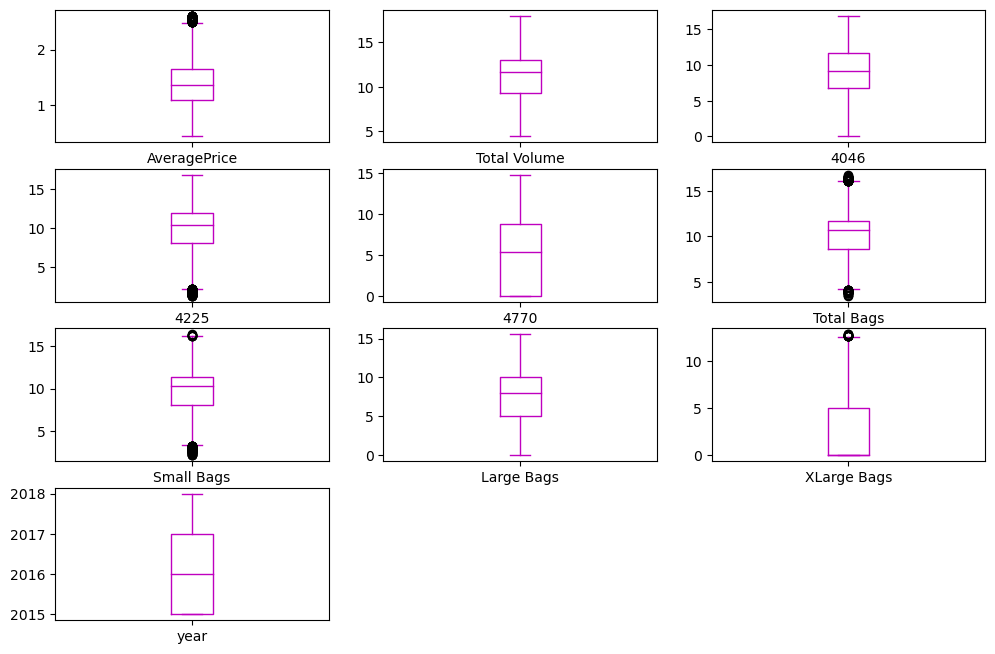

In [63]:
dn4.plot(kind='box',subplots=True,layout=(5,3),figsize=(12,10),color='m')

In [64]:
dn4.head(2)

Date  AveragePrice  Total Volume    4046     4225    4770  Total Bags  \
0 2015-12-27       1.33000      11.07034 6.94480 10.90515 3.89508     9.07083   
1 2015-12-20       1.35000      10.91287 6.51513 10.70638 4.08312     9.15974   

   Small Bags  Large Bags  XLarge Bags          type  year  region  
0     9.06005     4.54595      0.00000  conventional  2015  Albany  
1     9.14943     4.58996      0.00000  conventional  2015  Albany

In [65]:
dn4.shape

(17825, 13)

In [66]:
profile = dn4.profile_report(title="avocado after Data Preprocessing_final", progress_bar=False, minimal=True)
profile.to_file(output_file="avocado_profiling_after_preprocessing_final.html")

In [67]:
dn4['month'] = pd.DatetimeIndex(dn4['Date']).month                                             #Adding Month column
dn4.head(2)

Date  AveragePrice  Total Volume    4046     4225    4770  Total Bags  \
0 2015-12-27       1.33000      11.07034 6.94480 10.90515 3.89508     9.07083   
1 2015-12-20       1.35000      10.91287 6.51513 10.70638 4.08312     9.15974   

   Small Bags  Large Bags  XLarge Bags          type  year  region  month  
0     9.06005     4.54595      0.00000  conventional  2015  Albany     12  
1     9.14943     4.58996      0.00000  conventional  2015  Albany     12

In [68]:
dn4.tail(2)

Date  AveragePrice  Total Volume    4046    4225    4770  Total Bags  \
10 2018-01-14       1.93000       9.69315 7.33213 8.00036 6.59031     9.30297   
11 2018-01-07       1.62000       9.76942 7.97101 7.76520 5.41845     9.39392   

    Small Bags  Large Bags  XLarge Bags     type  year            region  \
10     9.29840     3.93183      0.00000  organic  2018  WestTexNewMexico   
11     9.39176     3.29621      0.00000  organic  2018  WestTexNewMexico   

    month  
10      1  
11      1

# 6. Exploratory Data Analysis

Sales (in Million $): year
2015   4385.46866
2016   4820.88989
2017   4934.30570
2018   1382.73834
Name: Total Volume, dtype: float64


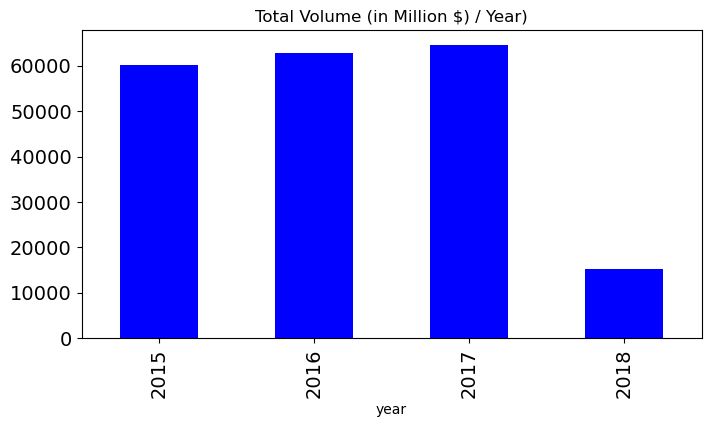

In [69]:
f,ax = plt.subplots(1,figsize=(8,4))
dn4.groupby(['year'])['Total Volume'].sum().plot(kind='bar', figsize=(8,4), fontsize=14, color='b')
plt.title('Total Volume (in Million $) / Year)')
print('Sales (in Million $):',(avocado_df.groupby(['year'])['Total Volume'].sum())/1000000)

Observation:
    
Highest Sales recorded in 2017

Sales drastically dropped in 2018

Average Price(in $): year
2015   1.37559
2016   1.33864
2017   1.51513
2018   1.34753
Name: AveragePrice, dtype: float64


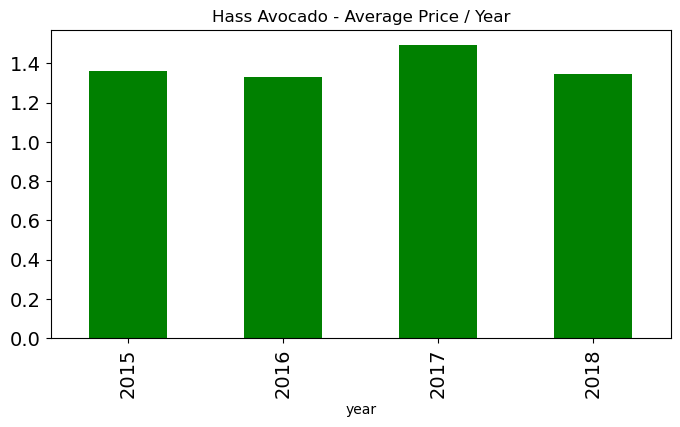

In [70]:
f,ax = plt.subplots(1,figsize=(6,3))
dn4.groupby(['year'])['AveragePrice'].mean().plot(kind='bar', figsize=(8,4), fontsize=14, color='green')
plt.title('Hass Avocado - Average Price / Year')
print('Average Price(in $):',avocado_df.groupby(['year'])['AveragePrice'].mean())

Total Unit Sold 4046: year
2015   1709.44998
2016   1525.12289
2017   1652.03813
2018    460.49973
Name: 4046, dtype: float64


Total Unit Sold 4225: year
2015   1761.05404
2016   1672.72829
2017   1544.73472
2018    407.75867
Name: 4225, dtype: float64


Total Unit Sold 4770: year
2015   142.77239
2016   159.87985
2017    91.21751
2018    22.93259
Name: 4770, dtype: float64


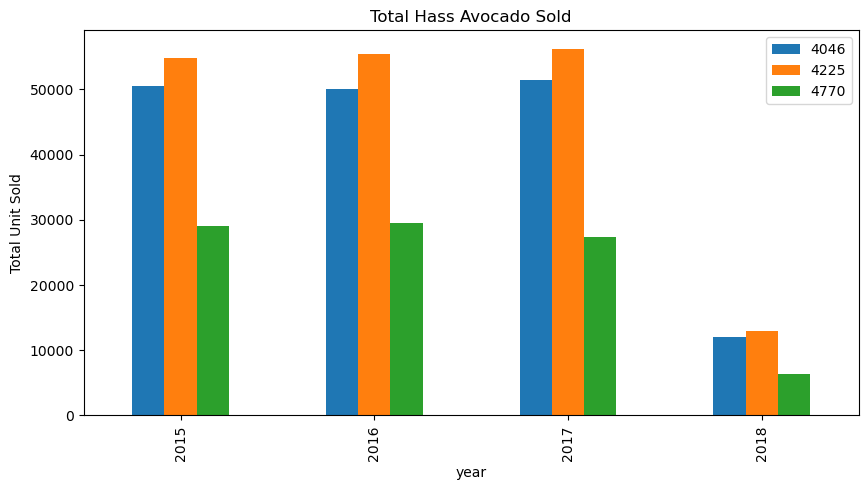

In [71]:
d2=d.copy()
d2.drop(['Date','AveragePrice','Total Volume','region','Total Bags','Small Bags','Large Bags','XLarge Bags'],axis=1,inplace=True)
d2.groupby(['year']).sum().plot(kind='bar',figsize=(10,5),legend=True)
plt.title ('Total Hass Avocado Sold')
plt.ylabel('Total Unit Sold')
print('Total Unit Sold 4046:',(avocado_df.groupby(['year'])['4046'].sum())/1000000)
print('\n')
print('Total Unit Sold 4225:',(avocado_df.groupby(['year'])['4225'].sum())/1000000)
print('\n')
print('Total Unit Sold 4770:',(avocado_df.groupby(['year'])['4770'].sum())/1000000)

Avg Monthly Price (in $/Unit): month
1    1.30747
2    1.27137
3    1.32409
4    1.36606
5    1.33484
6    1.39277
7    1.45241
8    1.48971
9    1.53463
10   1.54478
11   1.44354
12   1.32725
Name: AveragePrice, dtype: float64


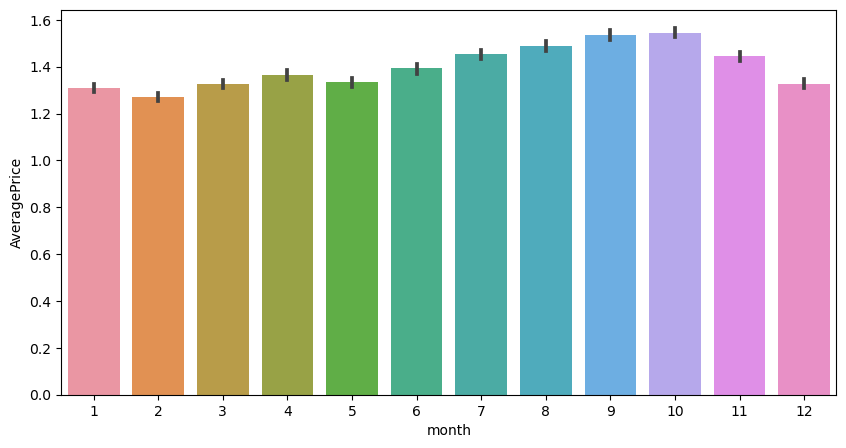

In [72]:
plt.figure(figsize=(10,5))
sns.barplot(x='month',y='AveragePrice',data=dn4)


print('Avg Monthly Price (in $/Unit):',dn4.groupby(['month'])['AveragePrice'].mean())

Total Small Bags sold (in Million): year
2015    634.68271
2016   1106.49424
2017   1222.95252
2018    360.74137
Name: Small Bags, dtype: float64


Total Large Bags sold (in Million): year
2015   132.06640
2016   336.62634
2017   399.33904
2018   123.58399
Name: Large Bags, dtype: float64


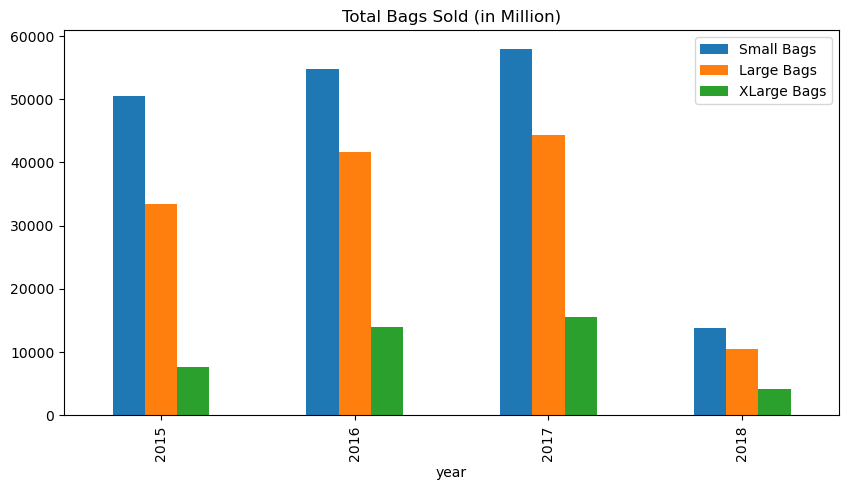

In [73]:
d3=d.copy()
d3.drop(['Date','AveragePrice','Total Volume','4046','4225','4770','region','Total Bags'],axis=1,inplace=True)
d3.groupby(['year']).sum().plot(kind='bar',figsize=(10,5),legend=True)
plt.title ('Total Bags Sold (in Million)')
print('Total Small Bags sold (in Million):',(avocado_df.groupby(['year'])['Small Bags'].sum())/1000000)
print('\n')
print('Total Large Bags sold (in Million):',(avocado_df.groupby(['year'])['Large Bags'].sum())/1000000)

Total Bags sold: year
2015    634682705.27000
2016   1106494239.62000
2017   1222952524.87000
2018    360741367.75000
Name: Small Bags, dtype: float64


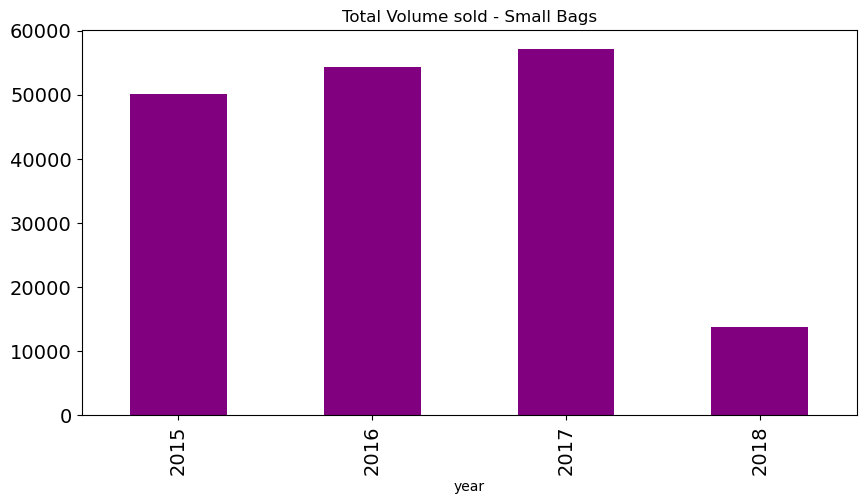

In [74]:
f,ax = plt.subplots(1,figsize=(6,3))
dn4.groupby(['year'])['Small Bags'].sum().plot(kind='bar', figsize=(10,5), fontsize=14, color='purple')
plt.title('Total Volume sold - Small Bags')
print('Total Bags sold:',avocado_df.groupby(['year'])['Small Bags'].sum())

Top Selling Region (in Million) region
California            1028.98165
BaltimoreWashington    134.71392
Chicago                133.70234
Boston                  97.27398
Atlanta                 88.60512
CincinnatiDayton        44.52201
Charlotte               35.55554
BuffaloRochester        22.96247
Albany                  16.06780
Boise                   14.41319
Name: Total Volume, dtype: float64


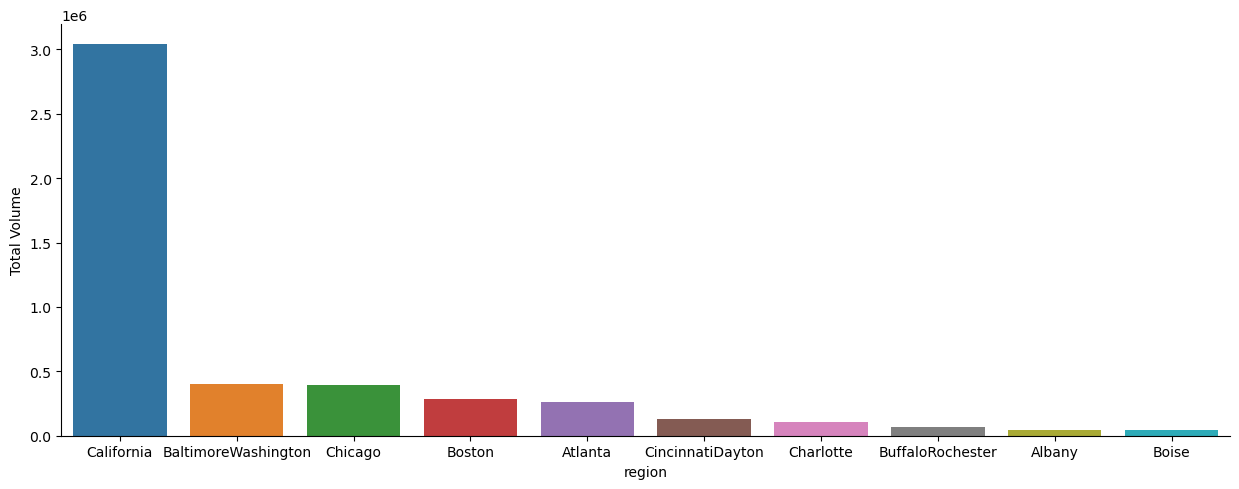

In [75]:
#sns.pairplot(d3, palette="viridis")
t_r=avocado_df.groupby(['region'])['Total Volume'].sum().head(10).sort_values(ascending=False).index.values
sns.catplot(data=avocado_df, x='region',  y='Total Volume',kind='bar',ci=None, legend_out=False, order = t_r,height=5, aspect=2.5)
print('Top Selling Region (in Million)',(avocado_df.groupby(['region'])['Total Volume'].sum().head(10).sort_values(ascending=False))/1000000)

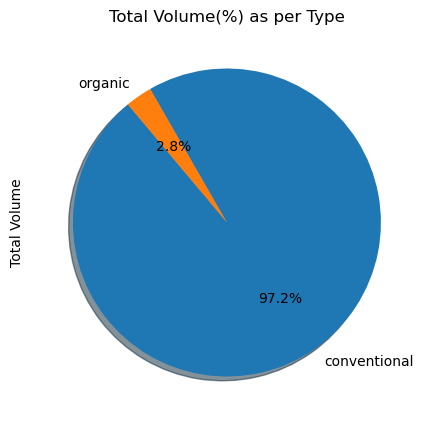

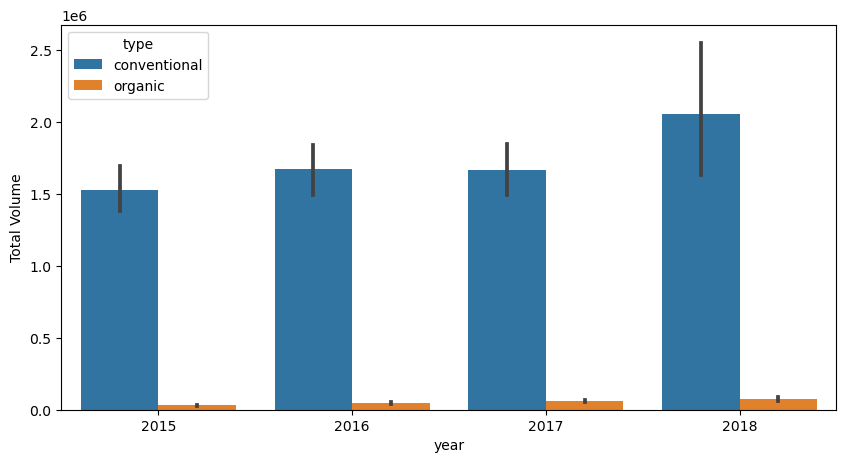

Based on Type:               AveragePrice  Total Volume       4046       4225      4770  \
type                                                                       
conventional       0.01057   15087.22091 5280.40992 5245.67334 414.37330   
organic            0.01509     436.18168   66.70082  140.60238   2.42904   

              Total Bags  Small Bags  Large Bags  XLarge Bags     year  
type                                                                    
conventional  4146.76433  3164.18311   925.90296     56.67826 18.39937  
organic        226.41146   160.68773    65.71281      0.01092 18.39332  


In [76]:
avocado_df.groupby(['type'])['Total Volume'].sum().plot(kind='pie',subplots=True,figsize=(10,5),
autopct='%1.1f%%', shadow=True, startangle=130)
plt.title('Total Volume(%) as per Type')

plt.figure(figsize=(10,5))
sns.barplot(x='year',y='Total Volume',hue='type', data=avocado_df)
plt.show()

print('Based on Type:',(avocado_df.groupby(['type']).sum())/1000000)

Observation:
    
Conventional Types were sold with high volumne every year than Organic that means demand for conventional is high.

Total Sales volumen of conventional is 97.2% where organic type contribute 2.8% only.

KeyboardInterrupt: 

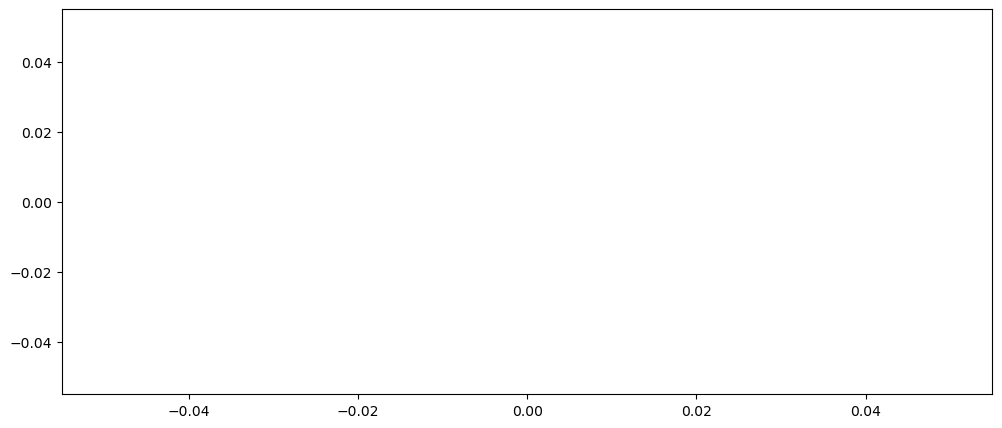

In [78]:
plt.figure(figsize=(12,5))
sns.lineplot(x='month',y='AveragePrice',hue='type', data=dn4)
plt.show()
print('Average Price:',avocado_df.groupby(['type'])['AveragePrice'].mean())

# Finding Coleration & Label Encoding

1.'types' Column has only two catagory wherein One Hot Encoding can be applied but for region we have total 54 catagories hence One Hot Encoding will add more 53 columns into Data Set and to avoid further complication to analysis, opting to drop 'Region' here.

2.Even Normal or Ordinal incoding may create confusion to model so said technique also cannot be applied.

In [79]:
dn5=pd.get_dummies(dn4.drop(['region','Date'],axis=1),drop_first=True) # one Hot Encoding by droping 'Region'
dn5.head(2)
dn6=pd.get_dummies(dn4.drop(['Date'],axis=1),drop_first=True)          #One Hot Encoding considering 'Region'
dn6.head(2)
print(dn5.shape)
print(dn6.shape)

(17825, 12)
(17825, 65)


<Figure size 1000x800 with 0 Axes>

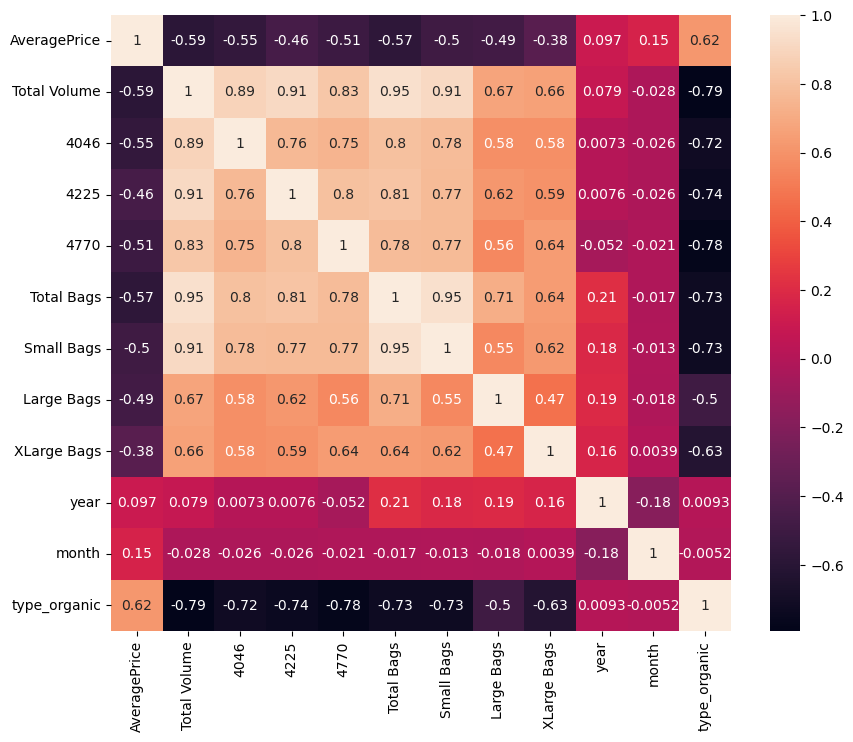

<Figure size 1000x800 with 0 Axes>

In [80]:
dn5.corr()
plt.figure(figsize=(10,8))
sns.heatmap( dn5.corr(), annot=True);plt.figure(figsize=(10,8))

Observation

1.4046, 4227 & 4047 Type were sold highest in Small Bags

2.High coleration between Total Volume and Total Bags sold both are outcome of respective units sold accordingly.

# 7. FEATURE SELECTION

1.To reduce noice and overfitting model, we have reduced / removed outliers from dataset. Now Data distribution seems normally distributed after applying Log1P method.

2.Before selecting model, we need to define Independant variable and Target Variable

3.To meet assumptions for regression problem, we need to drop highly corelated variables into Data Set. Hence We observed Total Volume and Total Bags are outcome of Total sales of Avocado Types (4046, 4225, 4770) followed by Types of Bags (Small, Large & Xlarge) sold. Year is outcome of month hence to be dropped.

4.Need to Check, if accurancy of model get affected by droping some columns then such instances to be avoided accordinlgy.

# Checking Assumptions

In [81]:
feature_cols = ['Total Volume','4046','4225','4770','Small Bags','Large Bags','XLarge Bags','month','type_organic'] 
x=dn5[feature_cols]
y=dn5['AveragePrice']


In [82]:
print(x.shape)                      #Checking shape of Indenpendant Variable
print(y.shape)                      #Checking Shape of Target Variable 

(17825, 9)
(17825,)


In [83]:
x.head(2)

Total Volume    4046     4225    4770  Small Bags  Large Bags  XLarge Bags  \
0      11.07034 6.94480 10.90515 3.89508     9.06005     4.54595      0.00000   
1      10.91287 6.51513 10.70638 4.08312     9.14943     4.58996      0.00000   

   month  type_organic  
0     12             0  
1     12             0

In [84]:
y.head(2)

0   1.33000
1   1.35000
Name: AveragePrice, dtype: float64

In [85]:
scores = []
for i in range(1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = i)     
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    scores.append(r2_score(y_test, y_pred))

In [86]:
np.argmax(scores)

568

In [87]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=568)


In [88]:
print('Train cases as below')
print('X_train shape: ',x_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',x_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (14260, 9)
y_train shape:  (14260,)

Test cases as below
X_test shape:  (3565, 9)
y_test shape:  (3565,)


In [89]:
x_test.head(2)

Total Volume     4046     4225    4770  Small Bags  Large Bags  \
38       8.80730  7.05529  8.32314 0.00000     5.71811     7.00711   
27      13.19904 12.76552 11.10601 4.85888    10.84095    10.99192   

    XLarge Bags  month  type_organic  
38      0.00000      4             1  
27      9.45328      6             0

In [90]:
y_train.head(2)

35   1.83000
36   1.47000
Name: AveragePrice, dtype: float64

In [91]:
y_test.head(2)

38   1.59000
27   1.43000
Name: AveragePrice, dtype: float64

# 8. MODEL SELECTION

# 8.1 Linear Regression

In [93]:
# Train the Algorithm
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [94]:
regressor.intercept_ # beta0

1.883364801575268

In [95]:
regressor.coef_ # beta1, beta2, beta3 i.e Slope/Coefficient

array([-0.22097304,  0.01113991,  0.10131744, -0.00144439,  0.07409914,
       -0.01552726,  0.01084885,  0.01546702,  0.3869026 ])

In [96]:
feature_cols


['Total Volume',
 '4046',
 '4225',
 '4770',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'month',
 'type_organic']

In [97]:
feature_cols.insert(0,'Intercept')
feature_cols

['Intercept',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'month',
 'type_organic']

In [98]:
coef = regressor.coef_.tolist()
coef

[-0.22097303823828696,
 0.011139905301105025,
 0.101317440912328,
 -0.001444388785567757,
 0.0740991397014331,
 -0.015527258747781285,
 0.010848846505599051,
 0.01546701993713594,
 0.3869026036447433]

In [99]:
coef.insert(0, regressor.intercept_)
coef

[1.883364801575268,
 -0.22097303823828696,
 0.011139905301105025,
 0.101317440912328,
 -0.001444388785567757,
 0.0740991397014331,
 -0.015527258747781285,
 0.010848846505599051,
 0.01546701993713594,
 0.3869026036447433]

In [100]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept 1.883364801575268
Total Volume -0.22097303823828696
4046 0.011139905301105025
4225 0.101317440912328
4770 -0.001444388785567757
Small Bags 0.0740991397014331
Large Bags -0.015527258747781285
XLarge Bags 0.010848846505599051
month 0.01546701993713594
type_organic 0.3869026036447433


# Using the Model for Prediction

In [101]:
y_pred_train = regressor.predict(x_train)

In [102]:
y_pred_test = regressor.predict(x_test)

In [103]:
y_pred_train

array([1.52570518, 1.56432378, 1.08524955, ..., 1.6090396 , 1.17634303,
       1.05557101])

In [104]:
x_test.shape

(3565, 9)

In [105]:
y_pred_test

array([1.62274063, 1.05514355, 0.9983221 , ..., 1.45856109, 1.73107755,
       1.00916984])

In [107]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [108]:
MAE_train = mean_absolute_error(y_train, y_pred_train)
MAE_test = mean_absolute_error(y_test, y_pred_test)

In [109]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 0.20965848171942686
MAE for test set is 0.2007683282614422


In [110]:
MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)

In [111]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 0.07170878661512368
MSE for test set is 0.06594115868552364


In [112]:
RMSE_train = np.sqrt( mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

In [113]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 0.26778496338503344
RMSE for test set is 0.25679010628434196


# Model Evaluation using Rsquared value

In [114]:
from sklearn.metrics import r2_score
r2_score_train = r2_score(y_train, y_pred_train)
r2_score_test = r2_score(y_test, y_pred_test)

In [115]:
r2_score_train

0.519700806372986

In [116]:
r2_score_test

0.556295733093361

In [117]:
yhat = regressor.predict(x_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.5197008063729844 0.5193974595138515


In [118]:
yhat = regressor.predict(x_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.5562957330933628 0.5551724311518269


In [119]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

In [120]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.2007683282614422
MSE: 0.06594115868552364
RMSE: 0.25679010628434196


In [ ]:
sns.jointplot(x=y_test, y=pred, data=dnf, kind='reg',color='b');

In [ ]:
plt.style.use('ggplot')
fig, ax=plt.subplots(figsize=(15,8))
sns.lineplot(x= y_test.index,y =y_test,label='Actuals',color='blue',ax=ax)
sns.lineplot(x= y_test.index,y =y_pred_test,label='Predictions',color='red',ax=ax)
ax.set_title('Price: Actuals vs Predictions')
ax.set_ylabel('Price')
ax.set_xlabel('Index')

# 8.2 Decision Tree Regressor


In [125]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor 
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

DecisionTreeRegressor()

In [126]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)

Text(0, 0.5, 'Predicted Y')

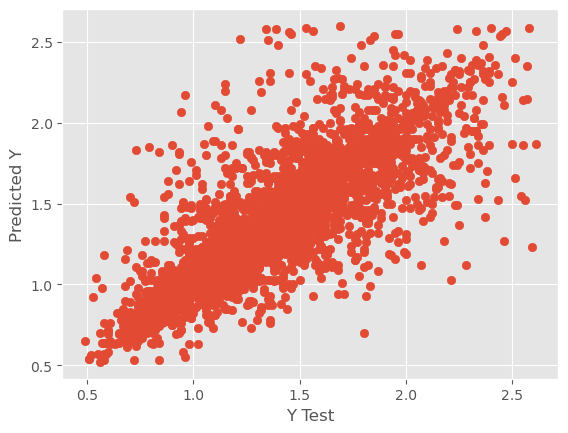

In [127]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [128]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.15481626928471248
MSE: 0.05728521739130434
RMSE: 0.23934330446307525


In [129]:
yhat = dtr.predict(x_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

1.0 1.0


In [130]:
yhat = dtr.predict(x_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.6145397518958617 0.6135639031664841


# 8.3 Random Forest Regressor

In [131]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(x_train,y_train)
pred=rdr.predict(x_test)

In [132]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.11378945301542774
MSE: 0.025549551669004203
RMSE: 0.15984227122073874


In [133]:
yhat = rdr.predict(x_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.9745018279311183 0.9744857238224433


In [134]:
yhat = rdr.predict(x_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8280824098473493 0.8276471754418995


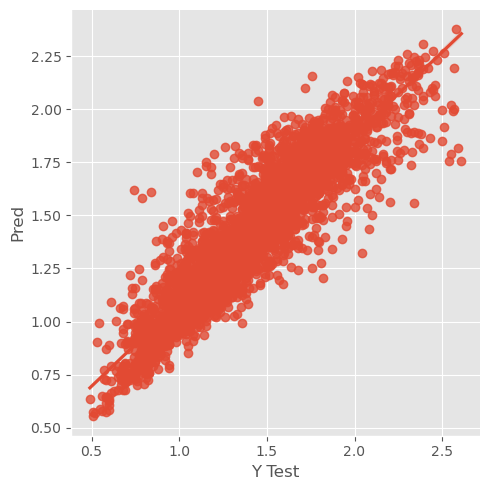

In [135]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')

# 9 Testing Model Accuracy

In [136]:
model = [DecisionTreeRegressor(), RandomForestRegressor()]
max_r2_score=0
for r_state in range(45,85):
    x_train, x_test, y_train,y_test=train_test_split(x,y,random_state=r_state, test_size=0.25)
    for i in model:
        i.fit(x_train, y_train)
        pre = i.predict(x_test)
        r2_sc=r2_score(y_test,pre)
        print('R2 Score correspond to random state',r_state,'is',r2_sc)
        if r2_sc>max_r2_score:
            max_r2_score=r2_sc
            final_state=r_state
            final_model=i
print()
print('max r2 score correspond to random state',final_state,'is',max_r2_score, 'and model is',final_model)

R2 Score correspond to random state 45 is 0.6017237836247852
R2 Score correspond to random state 45 is 0.8144046415658233
R2 Score correspond to random state 46 is 0.6343521669489977
R2 Score correspond to random state 46 is 0.820120700461899
R2 Score correspond to random state 47 is 0.6153871004589646
R2 Score correspond to random state 47 is 0.8146646595809879
R2 Score correspond to random state 48 is 0.5967786410726112
R2 Score correspond to random state 48 is 0.8142063651943892
R2 Score correspond to random state 49 is 0.6156195304669394
R2 Score correspond to random state 49 is 0.8116836988283811
R2 Score correspond to random state 50 is 0.6412616704640435
R2 Score correspond to random state 50 is 0.8196436639460648
R2 Score correspond to random state 51 is 0.608581837571708
R2 Score correspond to random state 51 is 0.815121900498848
R2 Score correspond to random state 52 is 0.5903058360922888
R2 Score correspond to random state 52 is 0.808304282721461
R2 Score correspond to rando

In [138]:
#checking the best parameters for prediction of RandomForestRegressor algo using GridsearchCV
x_train, x_test,y_train,y_test=train_test_split(x,y,random_state=64,test_size=0.2)
RM=RandomForestRegressor()
parameters={'n_estimators':range(1,45)}
gridsearch=GridSearchCV(RM,parameters)
gridsearch.fit(x_train,y_train)
gridsearch.best_params_

{'n_estimators': 42}

In [141]:
RFM=RandomForestRegressor(n_estimators=42)
RFM.fit(x_train,y_train)
pred=RFM.predict(x_test)
r2_sc=r2_score(y_test,pred)
adjusted_r_squared = 1 - (1-r2_sc)*(len(y)-1)/(len(y)-x.shape[1]-1)
print('R2 Score:',r2_sc)
print('Adj R2 Score:',adjusted_r_squared)

R2 Score: 0.827742144406792
Adj R2 Score: 0.827655121072504


In [139]:
print('Mean Absolute Error:',mean_absolute_error(y_test,pred))
print('Mean squared Error:',mean_squared_error(y_test,pred))
print('Root Mean Absolute Error:',np.sqrt(mean_absolute_error(y_test,pred)))

Mean Absolute Error: 0.4185318373071528
Mean squared Error: 0.2697354080504909
Root Mean Absolute Error: 0.6469403661135644


In [ ]:
sns.jointplot(x=y_test,y=pred,kind='reg', color='g')
plt.show()

# 10 : Summarization

In [145]:
dt = [['Linear Regression',0.2007,0.0659,0.256,0.556,0.555],
      ['Decision TreeRegressor', 0.156,0.0581,0.241,0.6087,0.6077],
      ['Random Forest Regressor',0.113,0.025,0.159,0.8289,0.8285],
      ['Random Forest Regressor(GSCV)',0.114,0.0262,0.337,0.8257,0.8256]]
con = pd.DataFrame(dt,columns=['Model','MAE','MSE','RSME','R-Sq','Adj R-Sq'])
con

Model     MAE     MSE    RSME    R-Sq  Adj R-Sq
0              Linear Regression 0.20070 0.06590 0.25600 0.55600   0.55500
1         Decision TreeRegressor 0.15600 0.05810 0.24100 0.60870   0.60770
2        Random Forest Regressor 0.11300 0.02500 0.15900 0.82890   0.82850
3  Random Forest Regressor(GSCV) 0.11400 0.02620 0.33700 0.82570   0.82560

Random Forest Regressor works well with Adj-R2 value : 0.826 among Linear Regression and Decision Tree Regressor.